# **Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning.**

Andrea Vianey Díaz Álvarez 
A01750147


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## **Importación de datos**

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


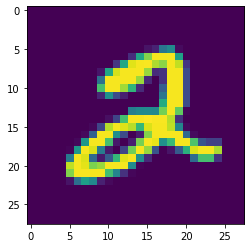

label : 2


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

labels = [0,1,2,3,4,5,6,7,8,9]

# Ejemplo una Imagen
plt.imshow(x_train[5])
plt.show()
print(f"label : {labels[y_train[5]]}")

## **Modelo CNN**

In [30]:
model = Sequential([
    Conv2D(100, kernel_size=(3, 3), padding='same', strides = 1, activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2, 2), strides = 2),
    Conv2D(100, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),
    Flatten(),
    Dense(10, activation='softmax')
])

In [31]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 100)       1000      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 100)       90100     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 100)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 100)         0         
                                                                 
 flatten_7 (Flatten)         (None, 3600)             

In [32]:
opt = tf.keras.optimizers.Adam(learning_rate=.0005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
Batch_size = 128
Epochs = 30

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[acc, mae])
history = model.fit(x_train[...,np.newaxis],y_train, batch_size= Batch_size, epochs= Epochs)

print(model.loss)
print(model.optimizer)
print(model.metrics_names)
print(model.optimizer.learning_rate)

Epoch 1/30
469/469 [==============================] - 5s 9ms/step - loss: 0.2939 - sparse_categorical_accuracy: 0.9175 - mean_absolute_error: 4.3737
Epoch 2/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0801 - sparse_categorical_accuracy: 0.9758 - mean_absolute_error: 4.3737
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0584 - sparse_categorical_accuracy: 0.9820 - mean_absolute_error: 4.3737
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0463 - sparse_categorical_accuracy: 0.9858 - mean_absolute_error: 4.3737
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0396 - sparse_categorical_accuracy: 0.9874 - mean_absolute_error: 4.3737
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0337 - sparse_categorical_accuracy: 0.9898 - mean_absolute_error: 4.3737
Epoch 7/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0289 - sparse_categorical_acc

## **Resultados**

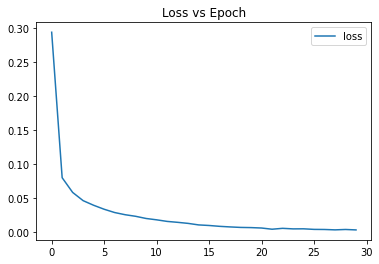

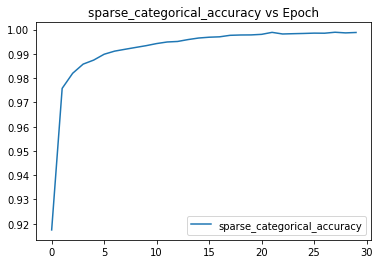

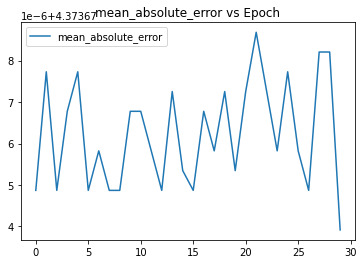

In [34]:
df = pd.DataFrame(history.history)
df.plot( y = "loss", title = "Loss vs Epoch")
df.plot( y = "sparse_categorical_accuracy", title = "sparse_categorical_accuracy vs Epoch")
df.plot( y = "mean_absolute_error", title = "mean_absolute_error vs Epoch")

## **Evaluación**

In [35]:
loss, accuracy, mae = model.evaluate(x_test[...,np.newaxis], y_test)
print("loss", loss)
print("acc", accuracy)
print("mae", mae)

313/313 [==============================] - 1s 3ms/step - loss: 0.0408 - sparse_categorical_accuracy: 0.9909 - mean_absolute_error: 4.3630
loss 0.040756337344646454
acc 0.9908999800682068
mae 4.3629984855651855


## **Predicciones**

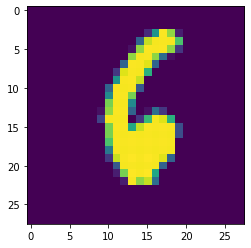

Label: 6
1/1 [==============================] - 0s 161ms/step
Predicción del modelo:  6


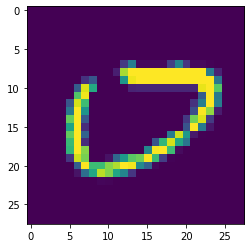

Label: 0
1/1 [==============================] - 0s 48ms/step
Predicción del modelo:  0


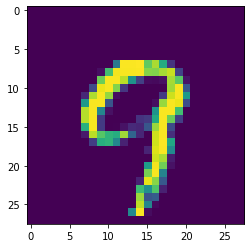

Label: 9
1/1 [==============================] - 0s 71ms/step
Predicción del modelo:  9


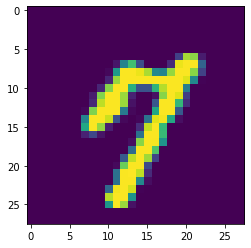

Label: 7
1/1 [==============================] - 0s 113ms/step
Predicción del modelo:  7


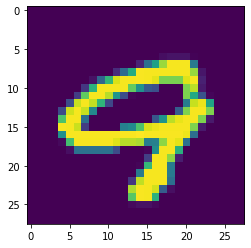

Label: 9
1/1 [==============================] - 0s 16ms/step
Predicción del modelo:  9


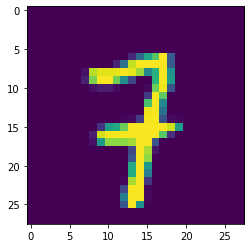

Label: 7
1/1 [==============================] - 0s 14ms/step
Predicción del modelo:  7


In [36]:
from tables import Column
for i in range(6):
  random_inx = np.random.choice(x_test.shape[0])
  test_image = x_test[random_inx]
  plt.imshow(test_image)
  plt.show()
  print(f"Label: {labels[y_test[random_inx]]}")
  #Prediccion
  pred = model.predict(test_image[np.newaxis,...,np.newaxis])
  print("Predicción del modelo: ", labels[np.argmax(pred)])